# By FFT solve PDE [python] heat diffusion equation by using Fast Fourier Transform
Source : 
https://www.youtube.com/watch?v=hDeARtZdq-U

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [7]:
plt.rcParams['figure.figsize']=[12,12]
plt.rcParams.update({'font.size':18})

a = 1
L = 100
N = 1000
dx = L/N
x = np.arange(-L/2,L/2,dx)

# kappa = 2*np.pi*np.fft.fftfreq(N,d=dx)/

In [12]:
kappa = 2*np.pi*np.fft.fftfreq(N,d=dx)
kappa.shape

(1000,)

In [73]:
u0 = np.zeros_like(x)
u0[int((L/3 -L/20)/dx):int((L/3 + L/20)/dx)] = 1
u0[int((2*L/3 -L/20)/dx):int((2*L/3 + L/20)/dx)] = 1
u0hat = np.fft.fft(u0)

In [74]:
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))
u0hat_ri.shape

(2000,)

In [75]:
dt = 0.1
t = np.arange(0,1000,dt)

In [77]:
def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N]+ (1j)*(uhat_ri[N:])
    d_uhat = -a**2 *np.power(kappa,2)*uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

In [78]:
uhat_ri = odeint(rhsHeat,u0hat_ri,t,args=(kappa,a))

In [79]:
uhat = uhat_ri[:,:N]+ (1j)*(uhat_ri[:,N:])
u = np.zeros_like(uhat)

In [80]:
for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])
u = u.real

In [81]:
u[0:-1:10].shape

(1000, 1000)

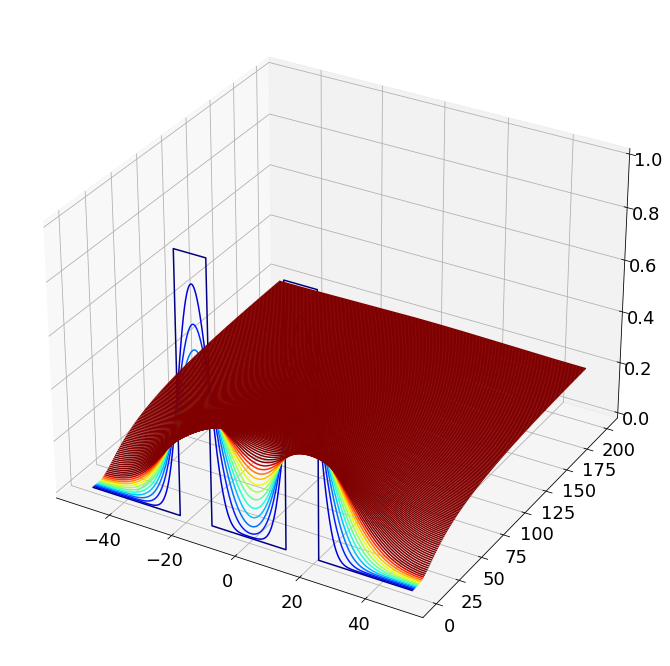

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.set_cmap('jet_r')
u_plot = u[0:-1:50,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:],color=cm.jet(j*20))

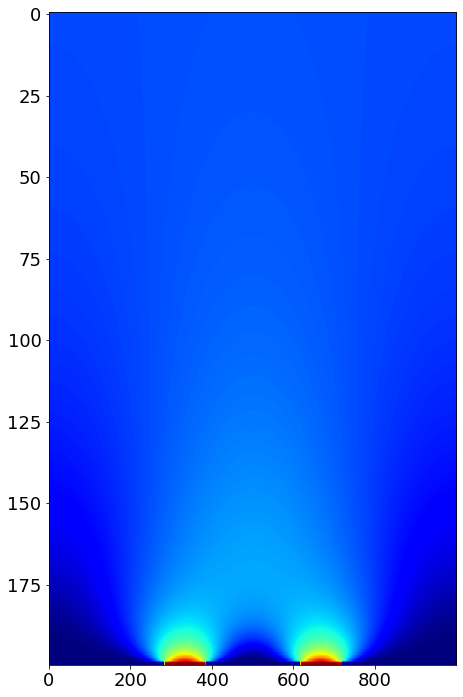

In [83]:
plt.figure()
plt.imshow(np.flipud(u[0:-1:50,:]),aspect=8)
plt.set_cmap('jet')
plt.show()